In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
# import plotly.express as px
# import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.DataFrame(pd.read_csv("/content/Loan_Data.csv"))
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [8]:
#df = df.replace(to_replace = '3+', value = 4)
#df['Dependents'].value_counts()
df['Dependents']=df['Dependents'].map({'0':0,'1':1,'2':2,'3+':4})
df['Dependents'].value_counts()

Dependents
0.0    345
1.0    102
2.0    101
4.0     51
Name: count, dtype: int64

In [9]:
df = df.replace({'Graduate': 1, 'Not Graduate': 0})
df['Education'].value_counts()

Education
1    480
0    134
Name: count, dtype: int64

In [10]:
df = df.replace({'Male': 1, 'Female': 0})
df['Gender'].value_counts()

Gender
1.0    489
0.0    112
Name: count, dtype: int64

In [11]:
df = df.replace({'Yes': 1, 'No': 0})
df['Self_Employed'].value_counts()

Self_Employed
0.0    500
1.0     82
Name: count, dtype: int64

In [12]:
df = df.replace({'Yes': 1, 'No': 0})
df['Married'].value_counts()

Married
1.0    398
0.0    213
Name: count, dtype: int64

In [13]:
df = df.replace({'Urban': 0, 'Rural': 1, 'Semiurban' : 2})
df['Property_Area'].value_counts()

Property_Area
2    233
0    202
1    179
Name: count, dtype: int64

In [14]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
df["loan_status"] = ord_enc.fit_transform(df[["Loan_Status"]])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loan_status
0,LP001002,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,Y,1.0
1,LP001003,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,N,0.0
2,LP001005,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,Y,1.0
3,LP001006,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,Y,1.0
4,LP001008,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,Y,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,1,Y,1.0
610,LP002979,1.0,1.0,4.0,1,0.0,4106,0.0,40.0,180.0,1.0,1,Y,1.0
611,LP002983,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,0,Y,1.0
612,LP002984,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,0,Y,1.0


In [15]:
df=df.drop(['Loan_Status','Loan_ID'],axis=1)

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0,1.0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1,0.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0,1.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0,1.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0,1.0


In [17]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
loan_status           0
dtype: int64

In [18]:
# Filling the missing values with random number, mean and median

In [19]:
df['Credit_History'].fillna(np.random.randint(0,2),inplace=True)

In [20]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0    139
Name: count, dtype: int64

In [21]:
df['Gender'].fillna(np.random.randint(0,2),inplace=True)

In [22]:
df['Gender'].value_counts()

Gender
1.0    502
0.0    112
Name: count, dtype: int64

In [23]:
df['Married'].fillna(np.random.randint(0,2),inplace=True)

In [24]:
df['Self_Employed'].fillna(np.random.randint(0,2),inplace=True)

In [25]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [26]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)

In [27]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [28]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)

In [29]:
df['Dependents'].fillna(df['Dependents'].median(),inplace=True)

In [30]:
df['Dependents'].value_counts()

Dependents
0.0    360
1.0    102
2.0    101
4.0     51
Name: count, dtype: int64

In [31]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.827362,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.773616,1.050489,0.687296
std,0.386497,0.476373,1.212833,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.418832,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [32]:
select_col= ['CoapplicantIncome']

In [33]:
select_col_df = df[['CoapplicantIncome']]
select_col_df = select_col_df.describe()
select_col_df

,CoapplicantIncome
count,614.000000
mean,1621.245798
std,2926.248369
min,0.000000
25%,0.000000
50%,1188.500000
75%,2297.250000
max,41667.000000


In [34]:
# Replacing the values equal to 0 by the median
#for col in df[select_col]:
#    df.loc[:,col].replace(0, df.loc[:,col].median(), inplace=True)

In [35]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.827362,0.781759,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.773616,1.050489,0.687296
std,0.386497,0.476373,1.212833,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.418832,0.840875,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,4.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [36]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
loan_status          0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  loan_status        614 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 57.7 KB


In [38]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_status
0,1.0,0.0,0.0,1,0.0,5849,0.0,146.412162,360.0,1.0,0,1.0
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.000000,360.0,1.0,1,0.0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.000000,360.0,1.0,0,1.0
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.000000,360.0,1.0,0,1.0
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.000000,360.0,1.0,0,1.0
5,1.0,1.0,2.0,1,1.0,5417,4196.0,267.000000,360.0,1.0,0,1.0
6,1.0,1.0,0.0,0,0.0,2333,1516.0,95.000000,360.0,1.0,0,1.0
7,1.0,1.0,4.0,1,0.0,3036,2504.0,158.000000,360.0,0.0,2,0.0
8,1.0,1.0,2.0,1,0.0,4006,1526.0,168.000000,360.0,1.0,0,1.0
9,1.0,1.0,1.0,1,0.0,12841,10968.0,349.000000,360.0,1.0,2,0.0


In [39]:
df.shape

(614, 12)

In [40]:
# EDA

In [41]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,loan_status
Gender,1.000000,0.364569,0.165877,-0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.026655,-0.082045,0.017987
Married,0.364569,1.000000,0.308408,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,-0.018150,0.003071,0.091478
Dependents,0.165877,0.308408,1.000000,-0.059001,0.048028,0.134080,0.034780,0.170666,-0.101674,-0.022470,0.008561,0.002474
Education,-0.045364,-0.012304,-0.059001,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.081637,0.003592,0.085884
Self_Employed,-0.000525,0.004489,0.048028,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.004994,0.021996,-0.003700
ApplicantIncome,0.058809,0.051708,0.134080,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,0.006986,-0.007894,-0.004710
CoapplicantIncome,0.082912,0.075948,0.034780,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,-0.058795,-0.028356,-0.059187
LoanAmount,0.107930,0.147141,0.170666,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.034518,0.013799,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101674,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.005446,0.089508,-0.020974
Credit_History,0.026655,-0.018150,-0.022470,0.081637,-0.004994,0.006986,-0.058795,-0.034518,0.005446,1.000000,0.055667,0.432616


<Axes: >

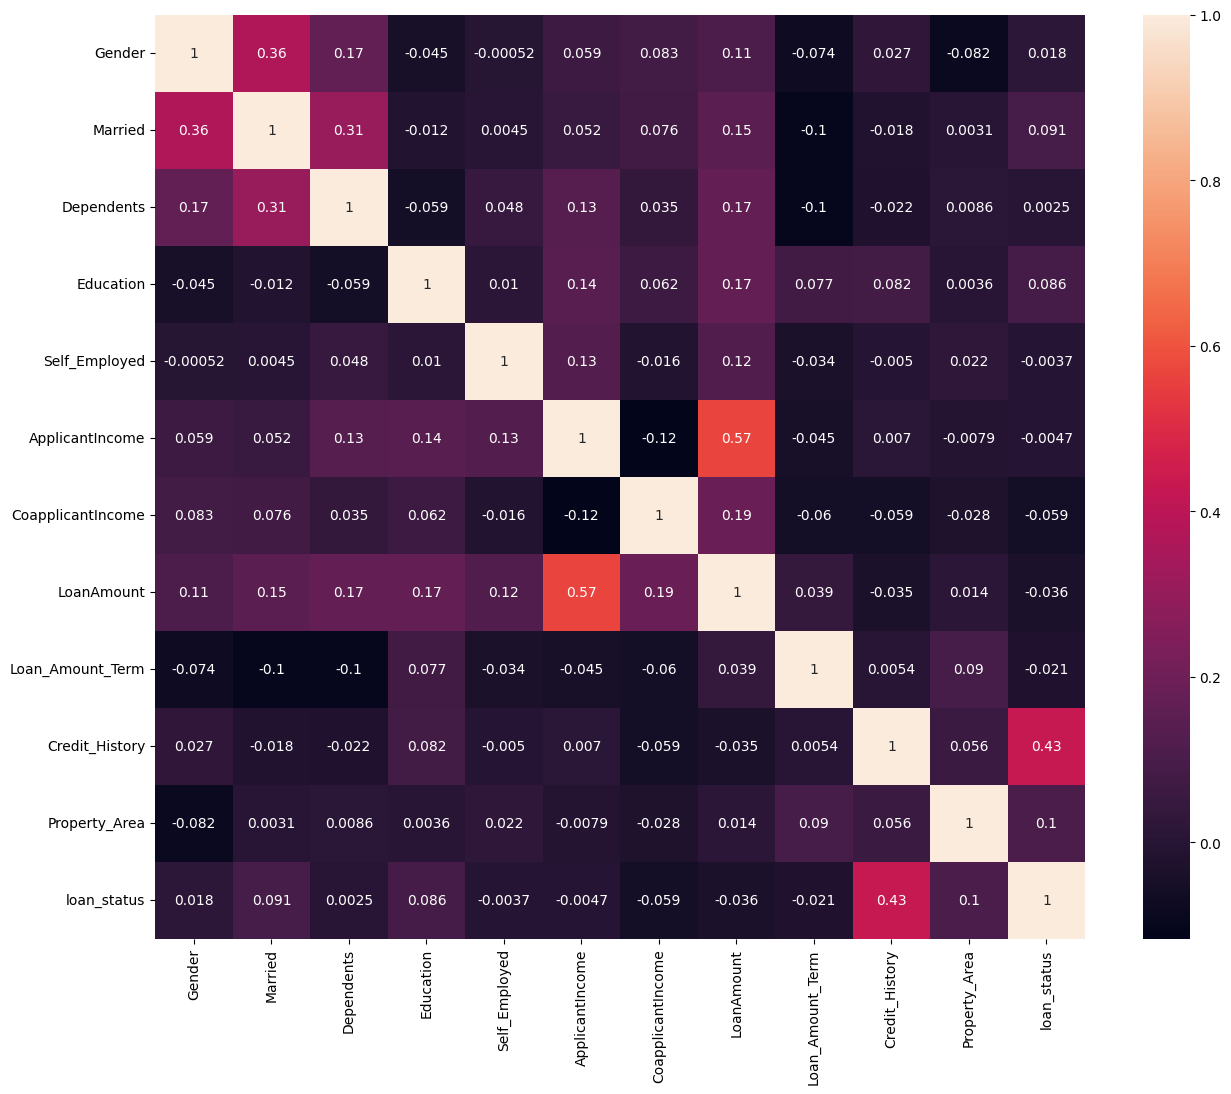

In [42]:
correlation = df.corr()
plt.figure(figsize = (15,12))
sns.heatmap(correlation, annot= True, cbar = True)

<Axes: xlabel='loan_status', ylabel='count'>

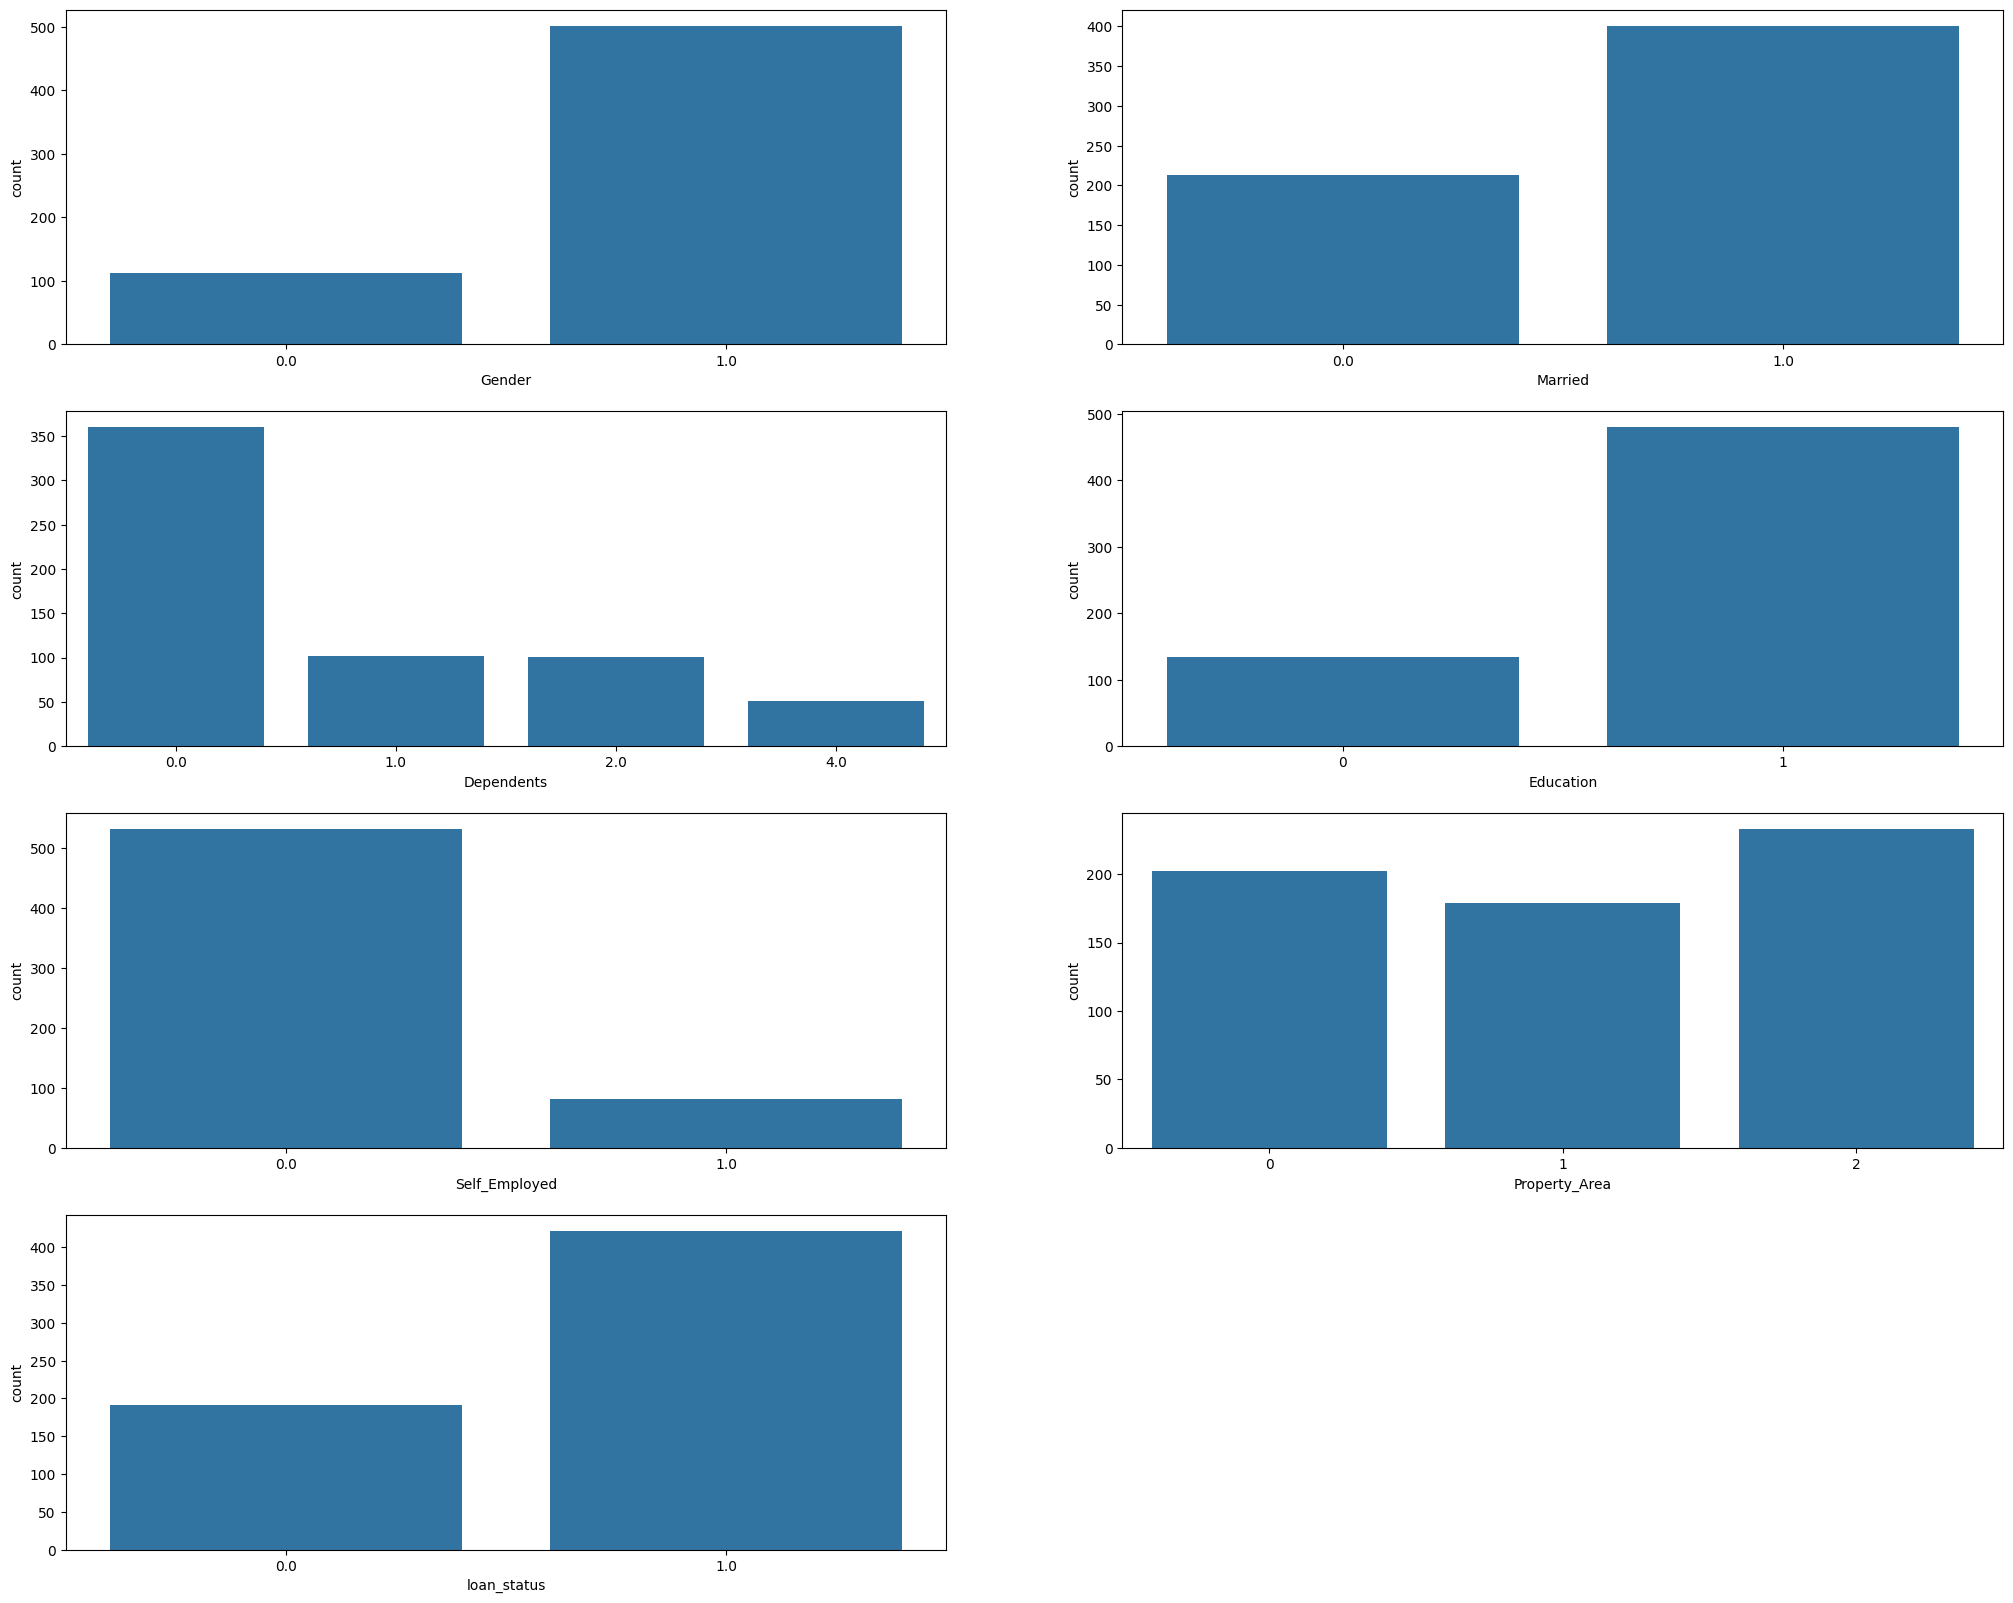

In [43]:
#Count plot of Independent variables(Categorical and ordinal)

plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', data = df)

plt.subplot(4,2,2)
sns.countplot(x = 'Married', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'Education', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'loan_status', data = df)


<ipython-input-44-3ca14c6cba87>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ApplicantIncome'], kde = True)
<ipython-input-44-3ca14c6cba87>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CoapplicantIncome'], kde = True)
<ipython-input-44-3ca14c6cba87>:13: UserWarning: 

`distplot`

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

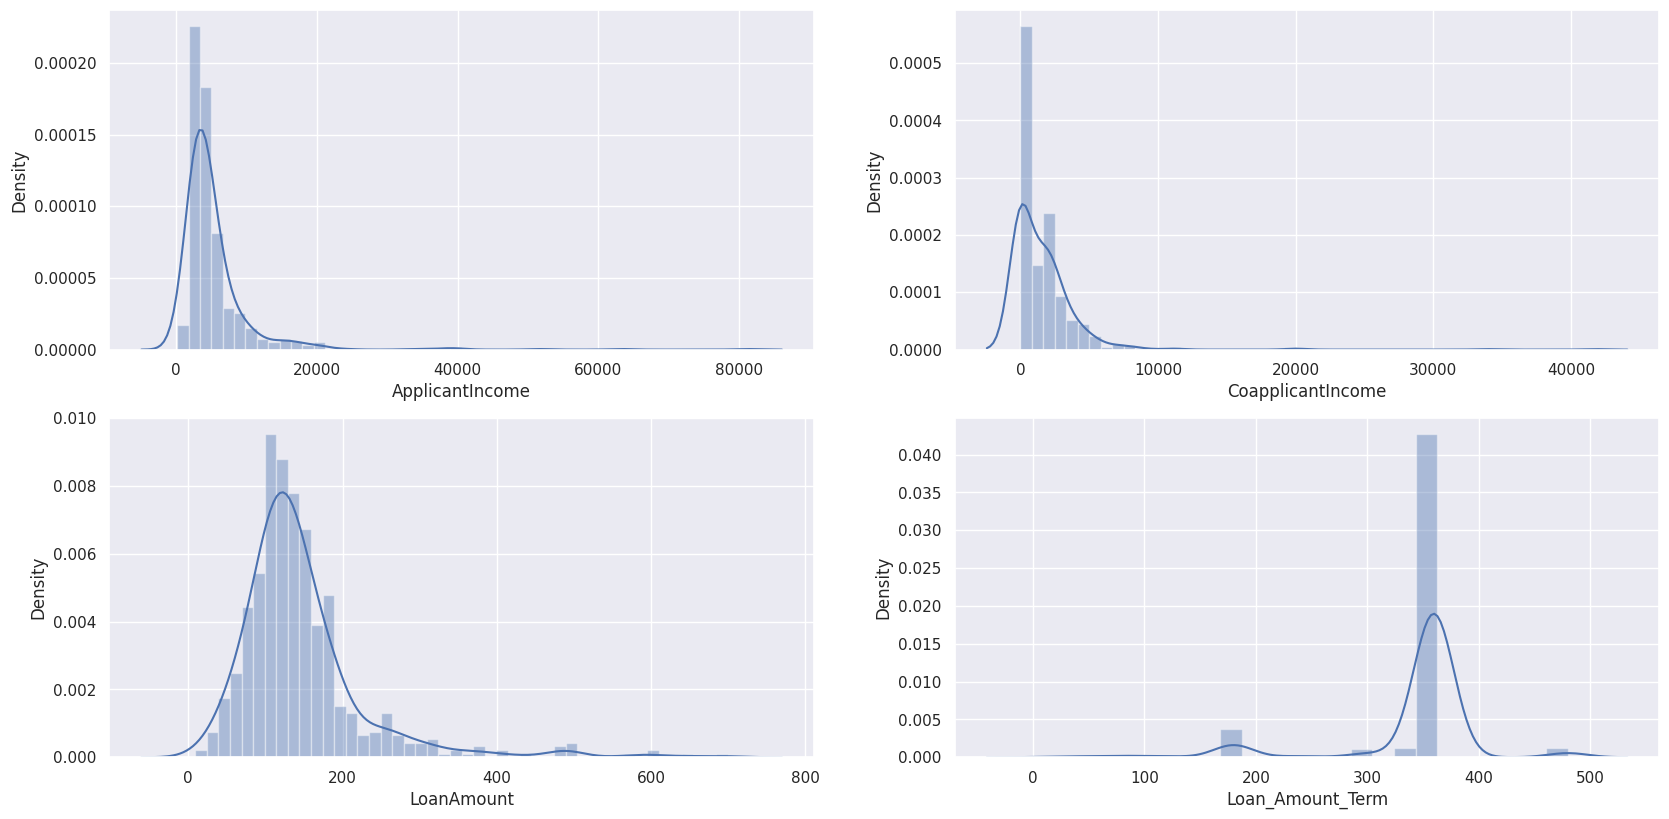

In [44]:
# Distribtion plot for Independent Variable(Numerical)

plt.figure(figsize = (20,15))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.distplot(df['ApplicantIncome'], kde = True)

plt.subplot(3,2,2)
sns.distplot(df['CoapplicantIncome'], kde = True)

plt.subplot(3,2,3)
sns.distplot(df['LoanAmount'], kde = True)

plt.subplot(3,2,4)
sns.distplot(df['Loan_Amount_Term'], kde = True)

<Axes: xlabel='Credit_History', ylabel='count'>

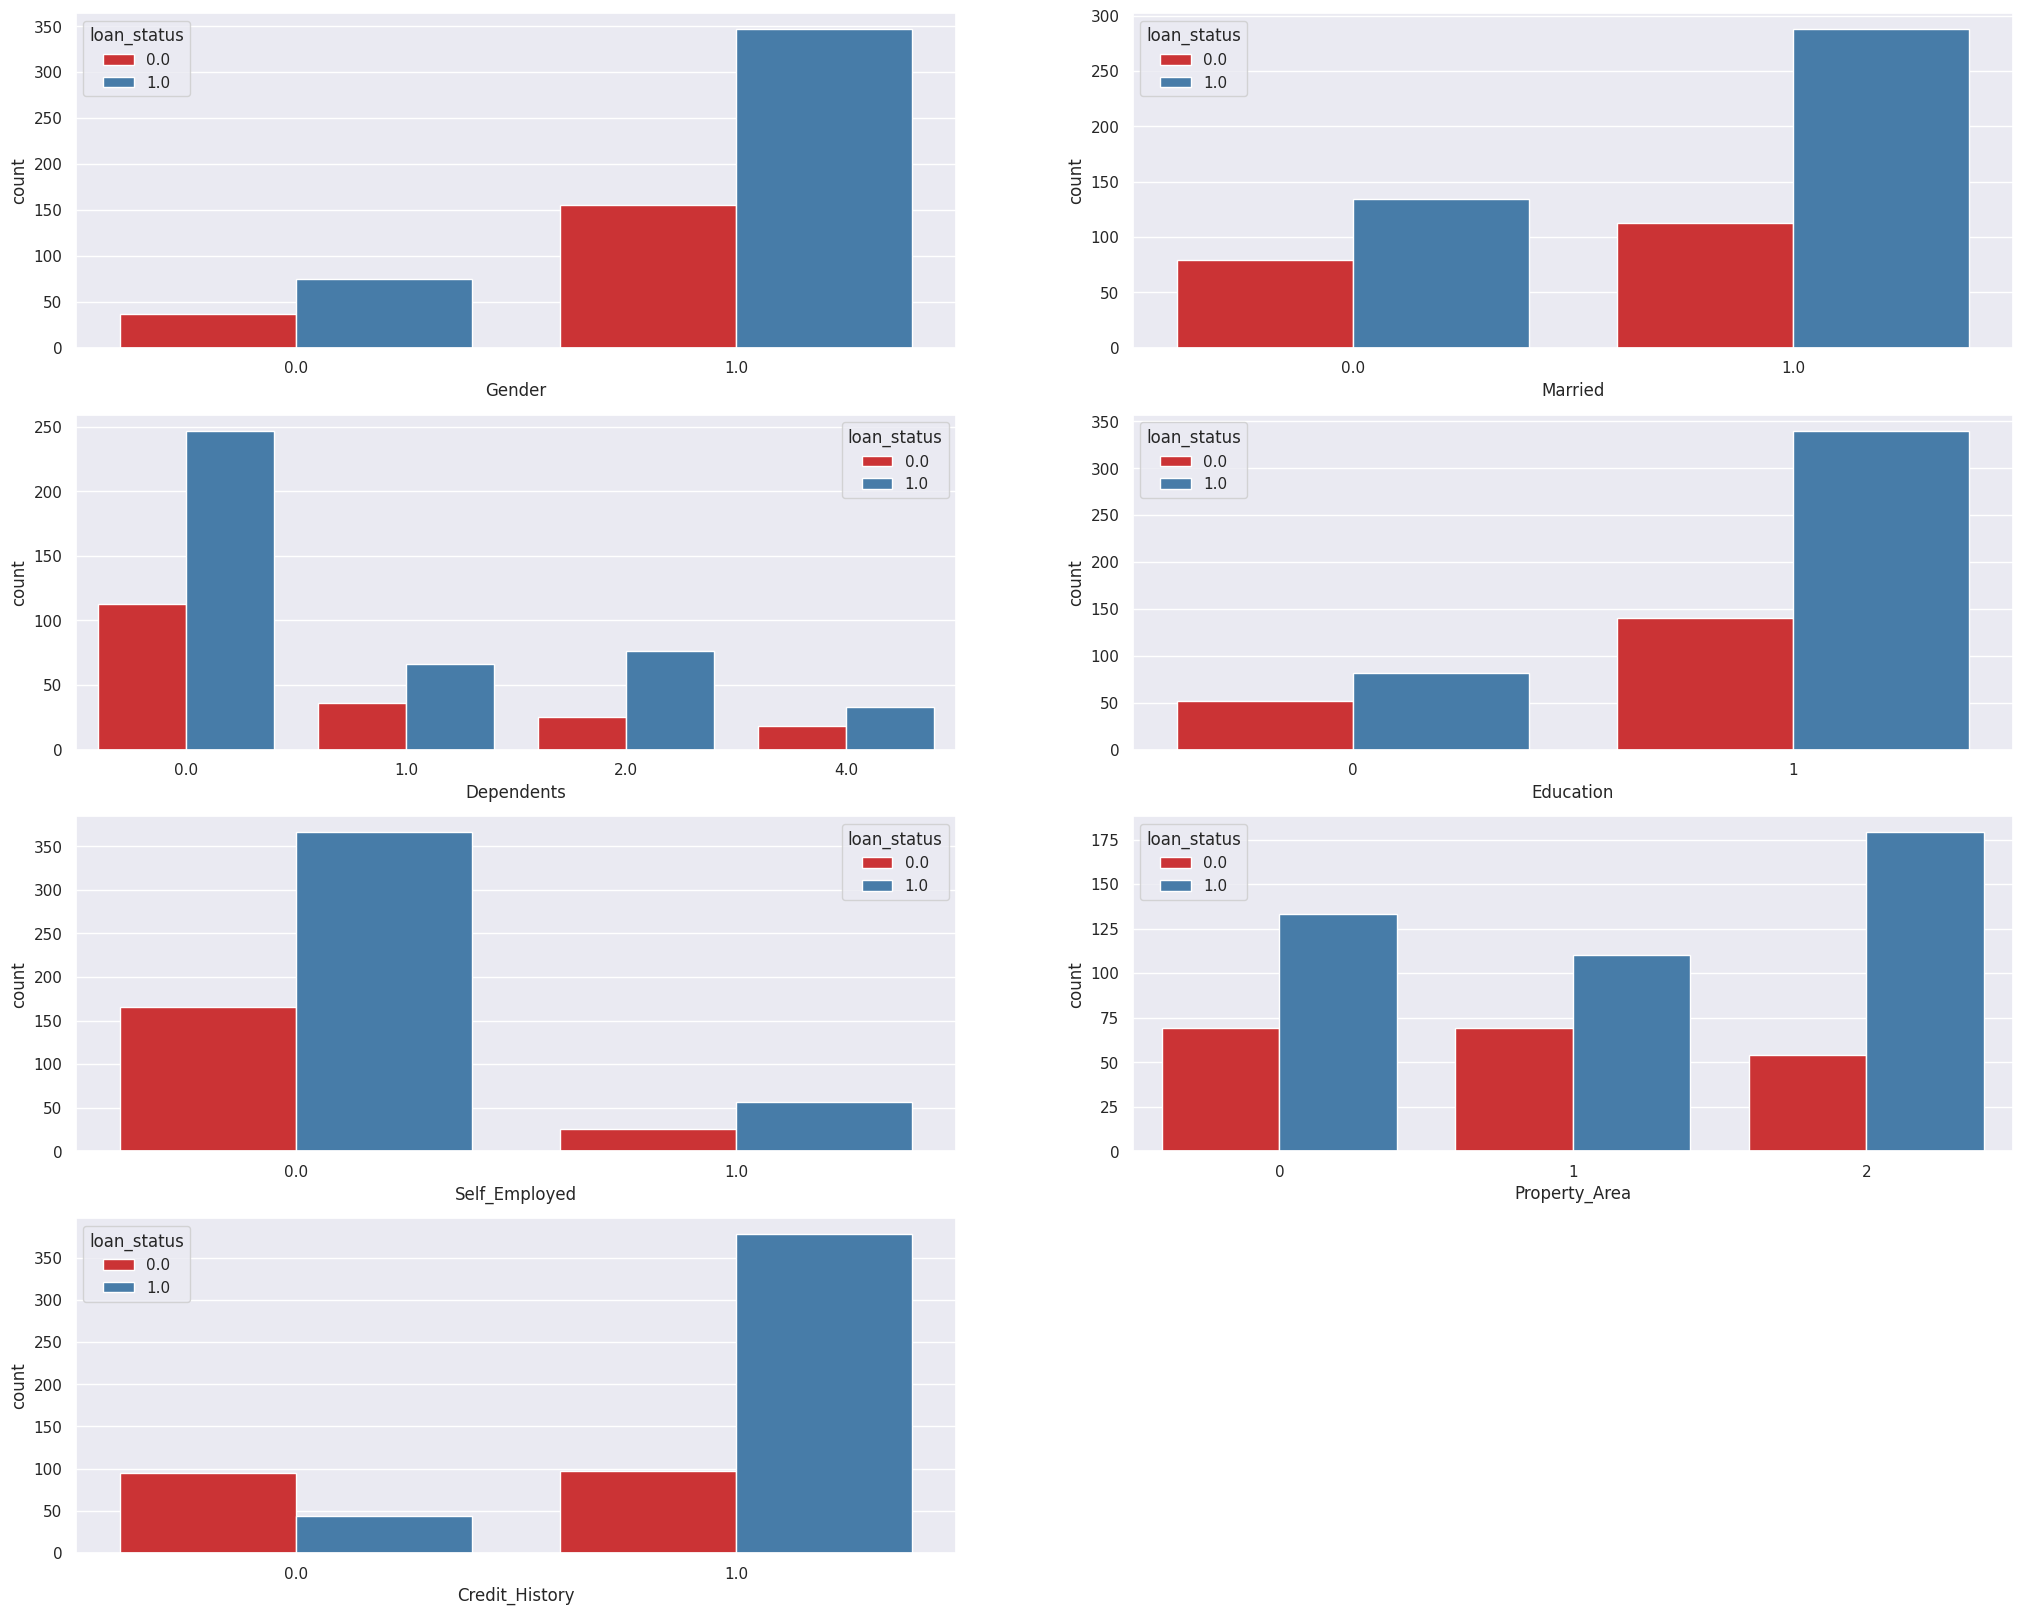

In [45]:
#Bivariate Analysis

plt.figure(figsize = (25,20))

plt.subplot(4,2,1)
sns.countplot(x = 'Gender', hue = 'loan_status', palette = 'Set1', data = df)
plt.subplot(4,2,2)
sns.countplot(x = 'Married', hue = 'loan_status',palette = 'Set1', data = df)
plt.subplot(4,2,3)
sns.countplot(x = 'Dependents', hue = 'loan_status', palette = 'Set1', data = df)
plt.subplot(4,2,4)
sns.countplot(x = 'Education', hue = 'loan_status', palette = 'Set1', data = df)
plt.subplot(4,2,5)
sns.countplot(x = 'Self_Employed', hue = 'loan_status', palette = 'Set1', data = df)
plt.subplot(4,2,6)
sns.countplot(x = 'Property_Area', hue = 'loan_status', palette = 'Set1', data = df)
plt.subplot(4,2,7)
sns.countplot(x = 'Credit_History', hue = 'loan_status', palette = 'Set1', data = df)

<Axes: xlabel='Loan_Amount_Term', ylabel='LoanAmount'>

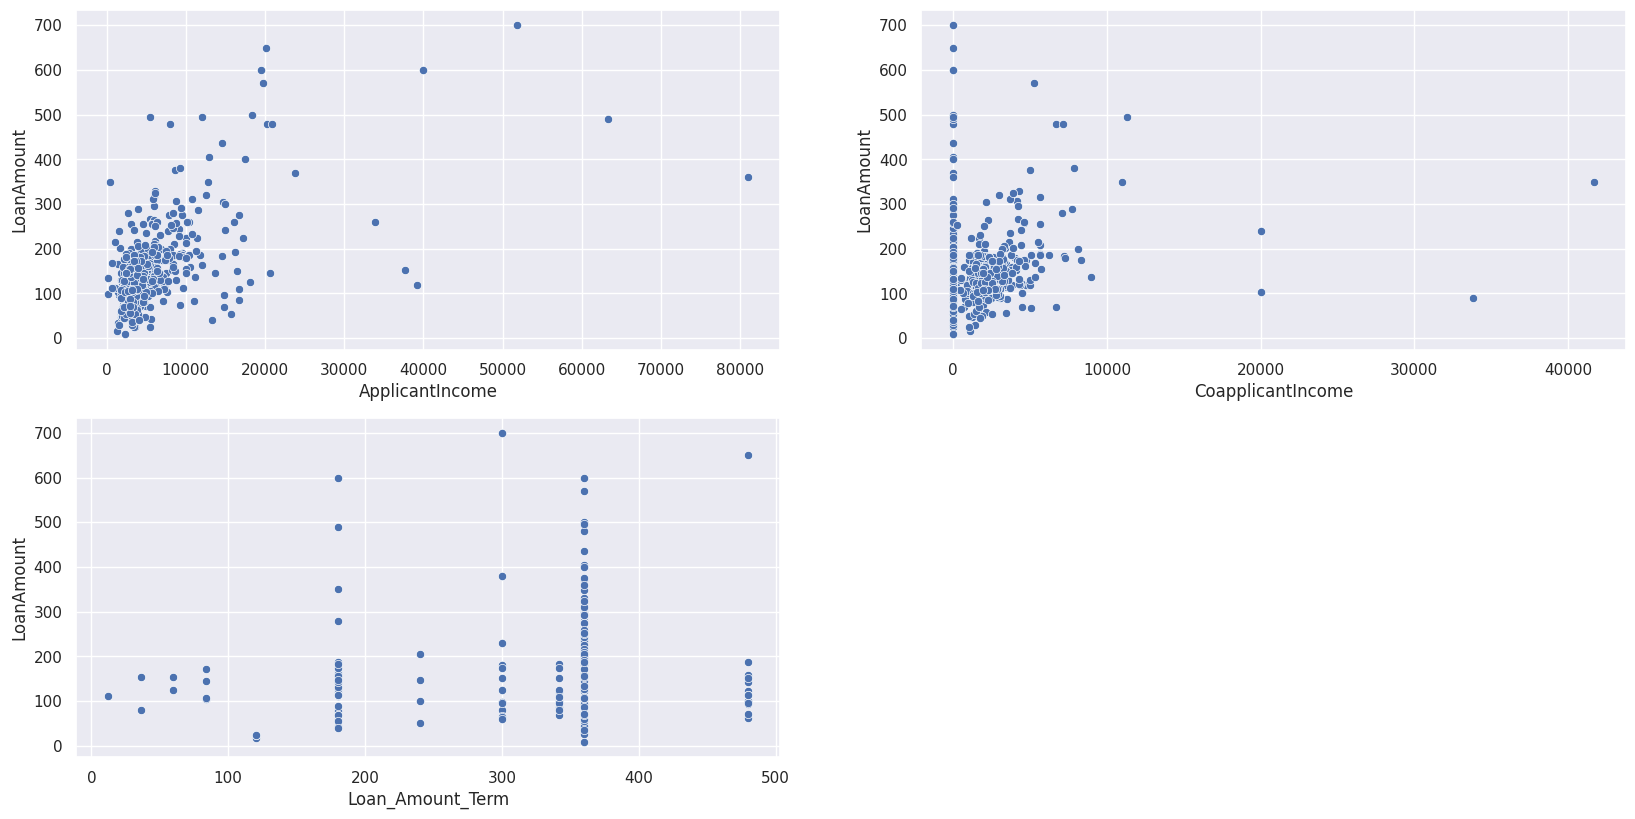

In [46]:
# scatterplot to see relationship between two variables

plt.figure(figsize = (20,15))
sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.scatterplot(x="ApplicantIncome", y="LoanAmount", data=df)

plt.subplot(3,2,2)
sns.scatterplot(x="CoapplicantIncome", y="LoanAmount", data=df)

plt.subplot(3,2,3)
sns.scatterplot(x="Loan_Amount_Term", y="LoanAmount", data=df)

In [47]:
#Splitting Dataset into X and y

X = df.drop('loan_status',axis=1)
y = df['loan_status']

In [48]:
# Splitting dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)
print(X_train.shape, X_test.shape)

(521, 11) (93, 11)


In [49]:
#Model Building

In [50]:
#1. LOGISTIC REGRESSION

In [51]:
LR=LogisticRegression(random_state=16, max_iter=1500)
lr_model=LR.fit(X_train,y_train)
lr_pred=LR.predict(X_test)

In [52]:
print("The train accuracy score = ",round(lr_model.score(X_train,y_train)*100,2))
print("The test accuracy score = ",round(lr_model.score(X_test,y_test)*100,2))

The train accuracy score =  76.39
The test accuracy score =  78.49


[[14 17]
 [ 3 59]]
    0   1
0  14  17
1   3  59
              precision    recall  f1-score   support

         0.0       0.82      0.45      0.58        31
         1.0       0.78      0.95      0.86        62

    accuracy                           0.78        93
   macro avg       0.80      0.70      0.72        93
weighted avg       0.79      0.78      0.76        93



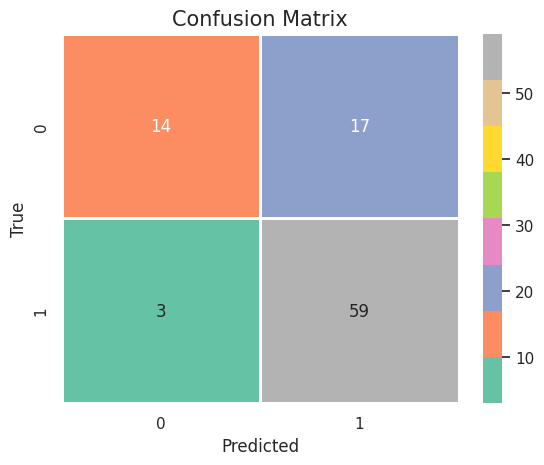

In [53]:
cm=confusion_matrix(y_test,lr_pred)
print(cm)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
print(df_cm)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
print(classification_report(y_test,lr_pred))
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [54]:
#2. Support Vector Machine(SVM)

In [55]:
svc= SVC()
svc_model=svc.fit(X_train,y_train)
svc_pred = svc.predict(X_test)

In [56]:
print("The train accuracy score = ",round(svc_model.score(X_train,y_train)*100,2))
print("The test accuracy score = ",round(svc_model.score(X_test,y_test)*100,2))

The train accuracy score =  69.87
The test accuracy score =  65.59


[[ 0 31]
 [ 1 61]]
   0   1
0  0  31
1  1  61
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        31
         1.0       0.66      0.98      0.79        62

    accuracy                           0.66        93
   macro avg       0.33      0.49      0.40        93
weighted avg       0.44      0.66      0.53        93



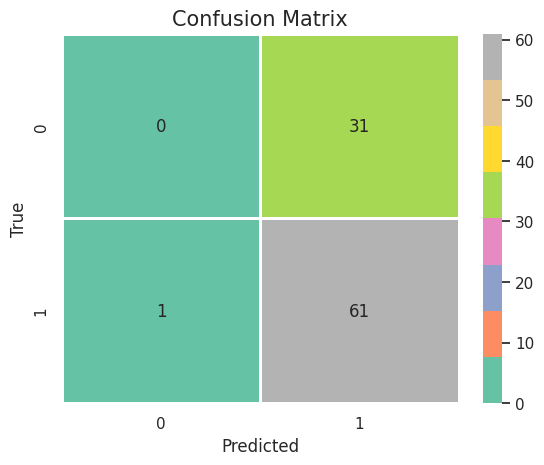

In [57]:
cm=confusion_matrix(y_test,svc_pred)
print(cm)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
print(df_cm)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
print(classification_report(y_test,svc_pred))
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [58]:
#3. KNN

In [59]:
test_accuracy = []
test_mse_value = []
train_accuracy = []
train_mse_value = []

for i in range(1,30):
  KNN= KNeighborsClassifier(n_neighbors=i)
  KNN.fit(X_train,y_train)
  test_pred = KNN.predict(X_test)
  train_pred = KNN.predict(X_train)

  test_acc= round(accuracy_score(y_test,test_pred), 5)*100 # Accuracy
  train_acc= round(accuracy_score(y_train,train_pred), 5)*100 # Accuracy

  mse1 = round(mean_squared_error(y_test,test_pred),3)
  mse2 = round(mean_squared_error(y_train,train_pred),3)

  test_accuracy.append(test_acc)
  train_accuracy.append(train_acc)

  test_mse_value.append(mse1)
  train_mse_value.append(mse2)

In [60]:
print(train_accuracy)

[100.0, 79.655, 77.54299999999999, 73.512, 74.664, 73.512, 72.553, 70.633, 72.553, 71.209, 71.977, 71.017, 70.633, 70.05799999999999, 70.25, 69.674, 70.825, 69.674, 70.633, 70.25, 70.05799999999999, 69.674, 70.05799999999999, 69.28999999999999, 70.05799999999999, 69.482, 70.25, 70.25, 70.825]


In [61]:
print(test_accuracy)

[60.214999999999996, 54.839000000000006, 59.14, 55.913999999999994, 59.14, 53.763000000000005, 63.441, 54.839000000000006, 61.29, 52.688, 62.366, 55.913999999999994, 61.29, 60.214999999999996, 63.441, 61.29, 62.366, 61.29, 64.51599999999999, 64.51599999999999, 64.51599999999999, 63.441, 63.441, 63.441, 65.591, 62.366, 63.441, 63.441, 65.591]


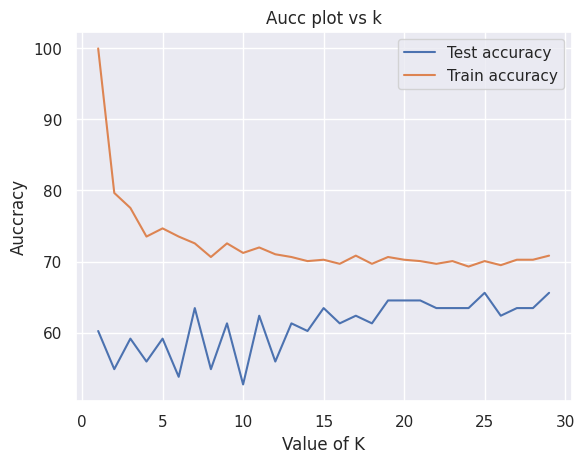

In [62]:
x = [i for i in range(1,30)]
y = test_accuracy
y1 = train_accuracy
plt.plot(x,y,label = 'Test accuracy')
plt.plot(x,y1,label = 'Train accuracy')

plt.title('Aucc plot vs k')
plt.xlabel('Value of K')
plt.ylabel('Auccracy')
plt.legend()
plt.show()

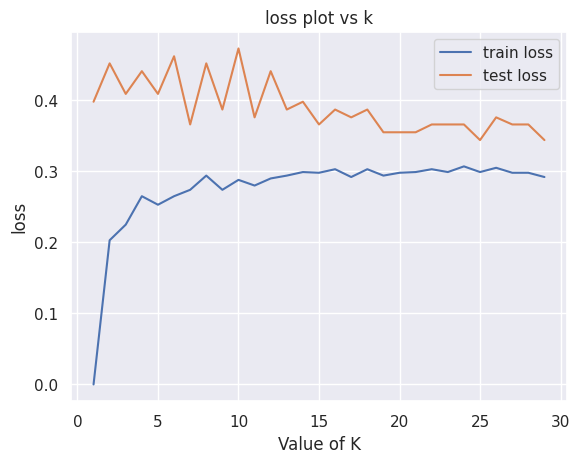

In [63]:
import matplotlib.pyplot as plt
x = [i for i in range(1,30)]
y = train_mse_value
y1 = test_mse_value
plt.plot(x,y,label = 'train loss')
plt.plot(x,y1,label = 'test loss')

plt.title('loss plot vs k')
plt.xlabel('Value of K')
plt.ylabel('loss')
plt.legend()
plt.show()

In [64]:
KNN = KNeighborsClassifier(n_neighbors=37)
knn_model=KNN.fit(X_train,y_train)
knn_pred= KNN.predict(X_test)

In [65]:
print("The train accuracy score = ",round(knn_model.score(X_train,y_train)*100,2))
print("The test accuracy score = ",round(knn_model.score(X_test,y_test)*100,2))

The train accuracy score =  69.1
The test accuracy score =  66.67


[[ 0 31]
 [ 0 62]]
   0   1
0  0  31
1  0  62
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        31
         1.0       0.67      1.00      0.80        62

    accuracy                           0.67        93
   macro avg       0.33      0.50      0.40        93
weighted avg       0.44      0.67      0.53        93



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


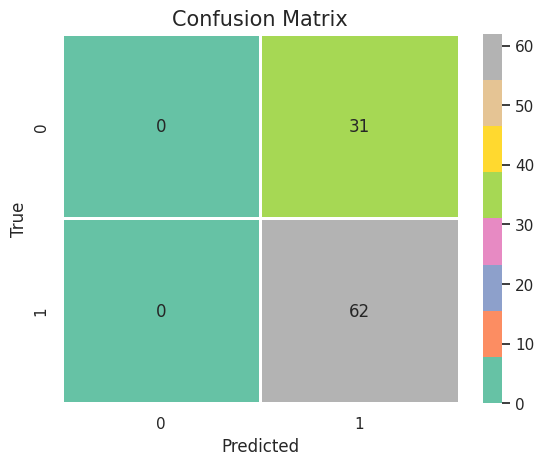

In [66]:
cm=confusion_matrix(y_test,knn_pred)
print(cm)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
print(df_cm)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
print(classification_report(y_test,knn_pred))
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [67]:
#4. RANDOM FOREST CLASSIFIER

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 40, class_weight = 'balanced')
rf_model = rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [69]:
print("The train accuracy score = ",round(rf_model.score(X_train,y_train)*100,2))
print("The test accuracy score = ",round(rf_model.score(X_test,y_test)*100,2))

The train accuracy score =  100.0
The test accuracy score =  74.19


[[14 17]
 [ 7 55]]
    0   1
0  14  17
1   7  55
              precision    recall  f1-score   support

         0.0       0.67      0.45      0.54        31
         1.0       0.76      0.89      0.82        62

    accuracy                           0.74        93
   macro avg       0.72      0.67      0.68        93
weighted avg       0.73      0.74      0.73        93



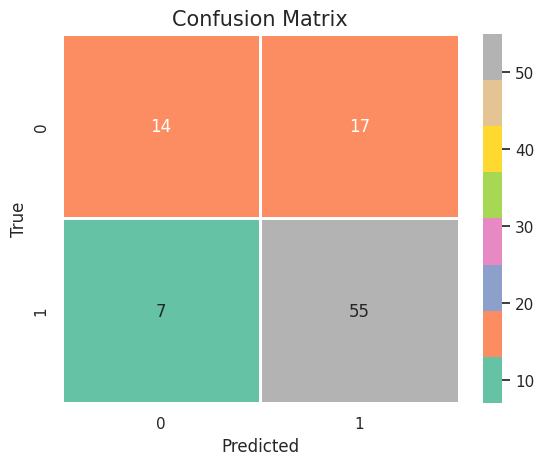

In [70]:
cm=confusion_matrix(y_test,rf_pred)
print(cm)
class_label = [0, 1]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
print(df_cm)
sns.heatmap(df_cm,annot=True,cmap='Set2',linewidths=2,fmt='d')
print(classification_report(y_test,rf_pred))
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [74]:
d = X_test.iloc[33:34]
d

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
218,1.0,1.0,2.0,1,0.0,5000,0.0,72.0,360.0,0.0,2


In [76]:
Y_score = LR.predict(d)[0]
print(Y_score)
if Y_score == 1:
  print("You are eligible for the loan")
else:
  print("Sorry, we cannot provide you the loan")

1.0
You are eligible for the loan


In [100]:
d2 = X_test.iloc[62:63]
d2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
392,1.0,1.0,0.0,1,0.0,2583,2115.0,120.0,360.0,0.0,0


In [101]:
Y1_score = LR.predict(d2)[0]
print(Y1_score)
if Y1_score == 1:
  print("You are eligible for the loan")
else:
  print("Sorry, we cannot provide you the loan")

0.0
Sorry, we cannot provide you the loan


In [111]:
data = {'Gender':[float(input("Gender? Enter 1 for male  or 0 for female = ")) for i in range(1)],
        'Married':[float(input("Married? Enter 1 for Yes or 0 for No = ")) for i in range(1)],
        "Dependents":[float(input("Dependents? Enter 0 for none or 1 for one or 2 for two or 4 for 3+ = ")) for i in range(1)],
        "Education":[float(input("Education? Enter 1 for Graduate or 0 fpr Not Graduate = ")) for i in range(1)],
        "Self_Employed":[float(input("Self_Employed? Enter 1 for Yes or 0 for No = ")) for i in range(1)],
        "ApplicantIncome":[float(input("Applicant Income? Enter Applicant's monthly income = "))],
        "CoapplicantIncome":[float(input("CoapplicantIncome? Enter Coapplicant's monthly income =  "))],
        "LoanAmount":[float(input("Enter Loan Amount per 1000 = "))],
        "Loan_Amount_Term":[float(input("Loan_Amount_Term? Enter 12 or 36 or 60 or 84 or 120 or 180 or 240 or 300 or 342 or 360 or 480 = "))],
        "Credit_History":[float(input("Credit History? Enter 1 for Cleared Debts or 0 for Uncleared Debts = ")) for i in range(1)],
        "Property_Area":[float(input("Property Area? Enter 0 for Urban or 1 for Rural or 2 for Semiurban =  "))for i in range(1)]}

df1 = pd.DataFrame(data)
prediction = LR.predict(df1)[0]
print("Prediction: ",prediction)
df1


Gender? Enter 1 for male  or 0 for female = 0
Married? Enter 1 for Yes or 0 for No = 1
Dependents? Enter 0 for none or 1 for one or 2 for two or 4 for 3+ = 2
Education? Enter 1 for Graduate or 0 fpr Not Graduate = 0
Self_Employed? Enter 1 for Yes or 0 for No = 1
Applicant Income? Enter Applicant's monthly income = 40000
CoapplicantIncome? Enter Coapplicant's monthly income =  20000
Enter Loan Amount per 1000 = 850
Loan_Amount_Term? Enter 12 or 36 or 60 or 84 or 120 or 180 or 240 or 300 or 342 or 360 or 480 = 12
Credit History? Enter 1 for Cleared Debts or 0 for Uncleared Debts = 1
Property Area? Enter 0 for Urban or 1 for Rural or 2 for Semiurban =  2
Prediction:  1.0


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1.0,2.0,0.0,1.0,40000.0,20000.0,850.0,12.0,1.0,2.0


In [112]:
if (prediction== 1):
  print('You are eligible for the loan')
else:
  print('Sorry, we cannot provide you the loan')

You are eligible for the loan


In [73]:
# Save the model using Logistic Regression as it gives the best accuracy

model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(lr_model, file)
print('Model Saved Succesfully!')

Model Saved Succesfully!
